In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sn

In [2]:
#'https://drive.google.com/open?id=1Sj1tjnsqz22y7xdhbU1AN3nOqPJ7uhPC'

In [3]:
wine = pd.read_csv('winequality-white-Copy1.csv', sep = ';')

In [4]:
wine.columns 
wine.columns = wine.columns.str.replace(' ', '_')
print(wine.columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [5]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Check for null values

In [6]:
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

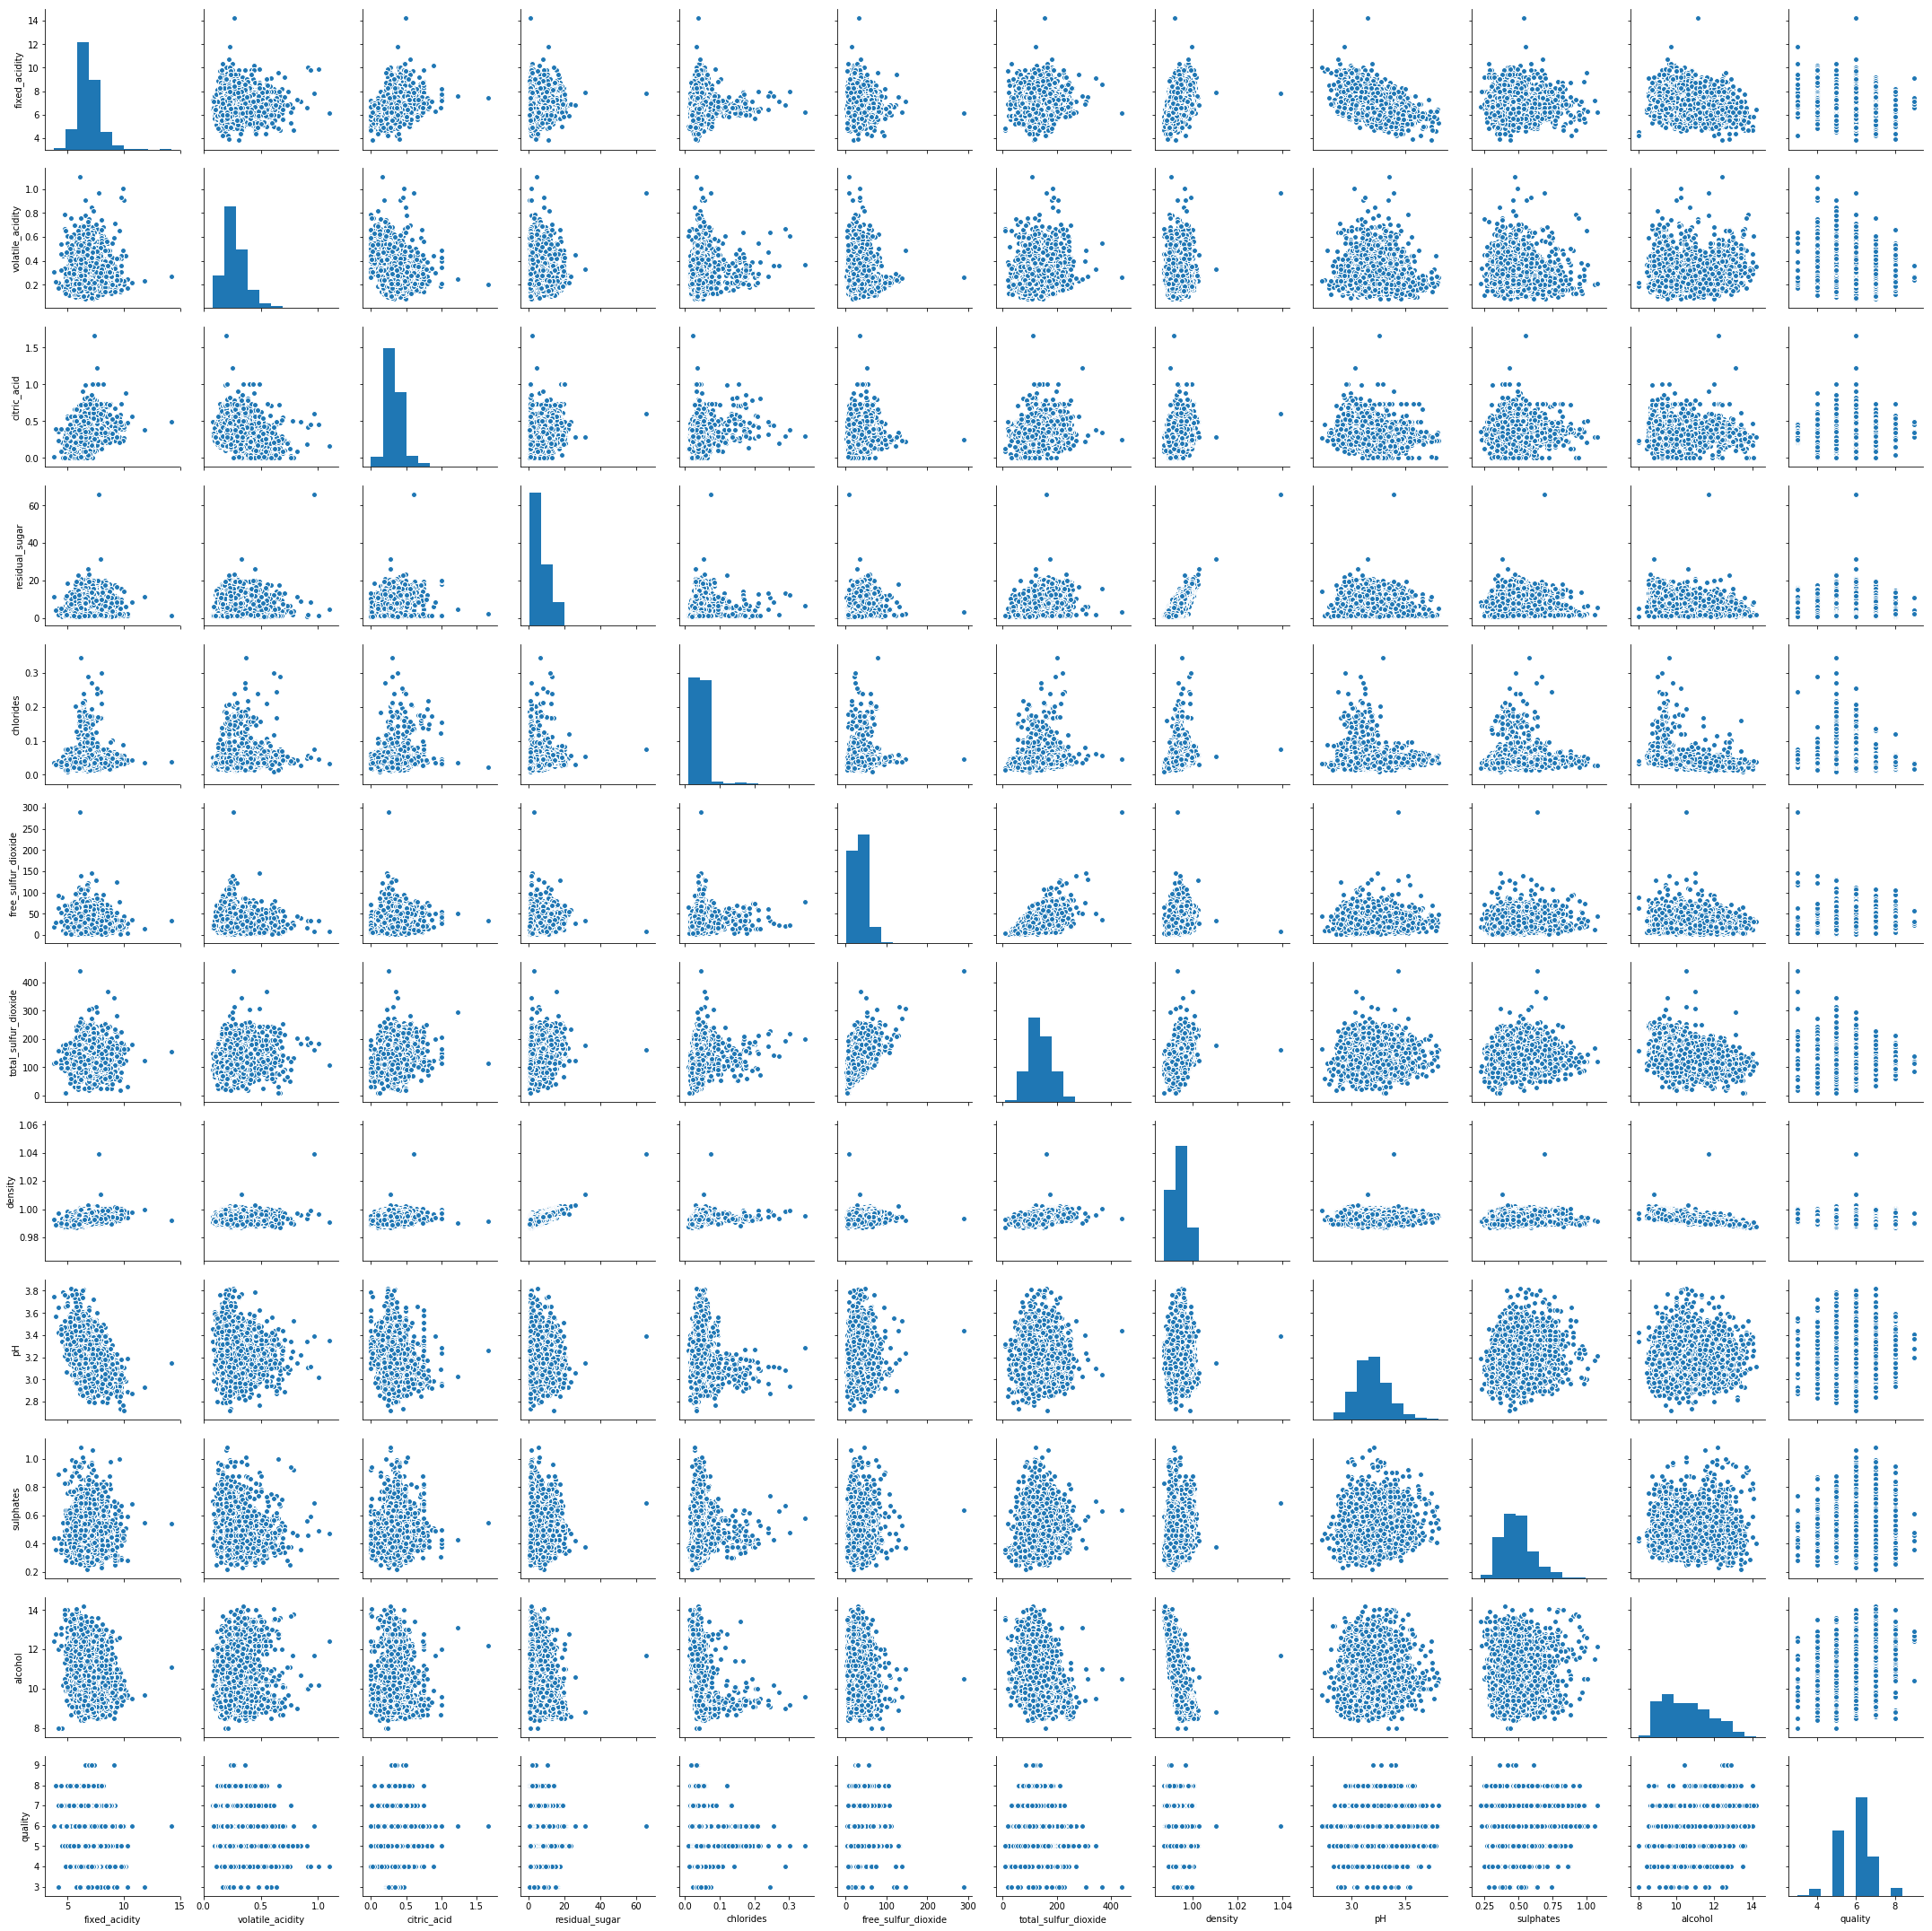

In [7]:
sn.pairplot(wine)

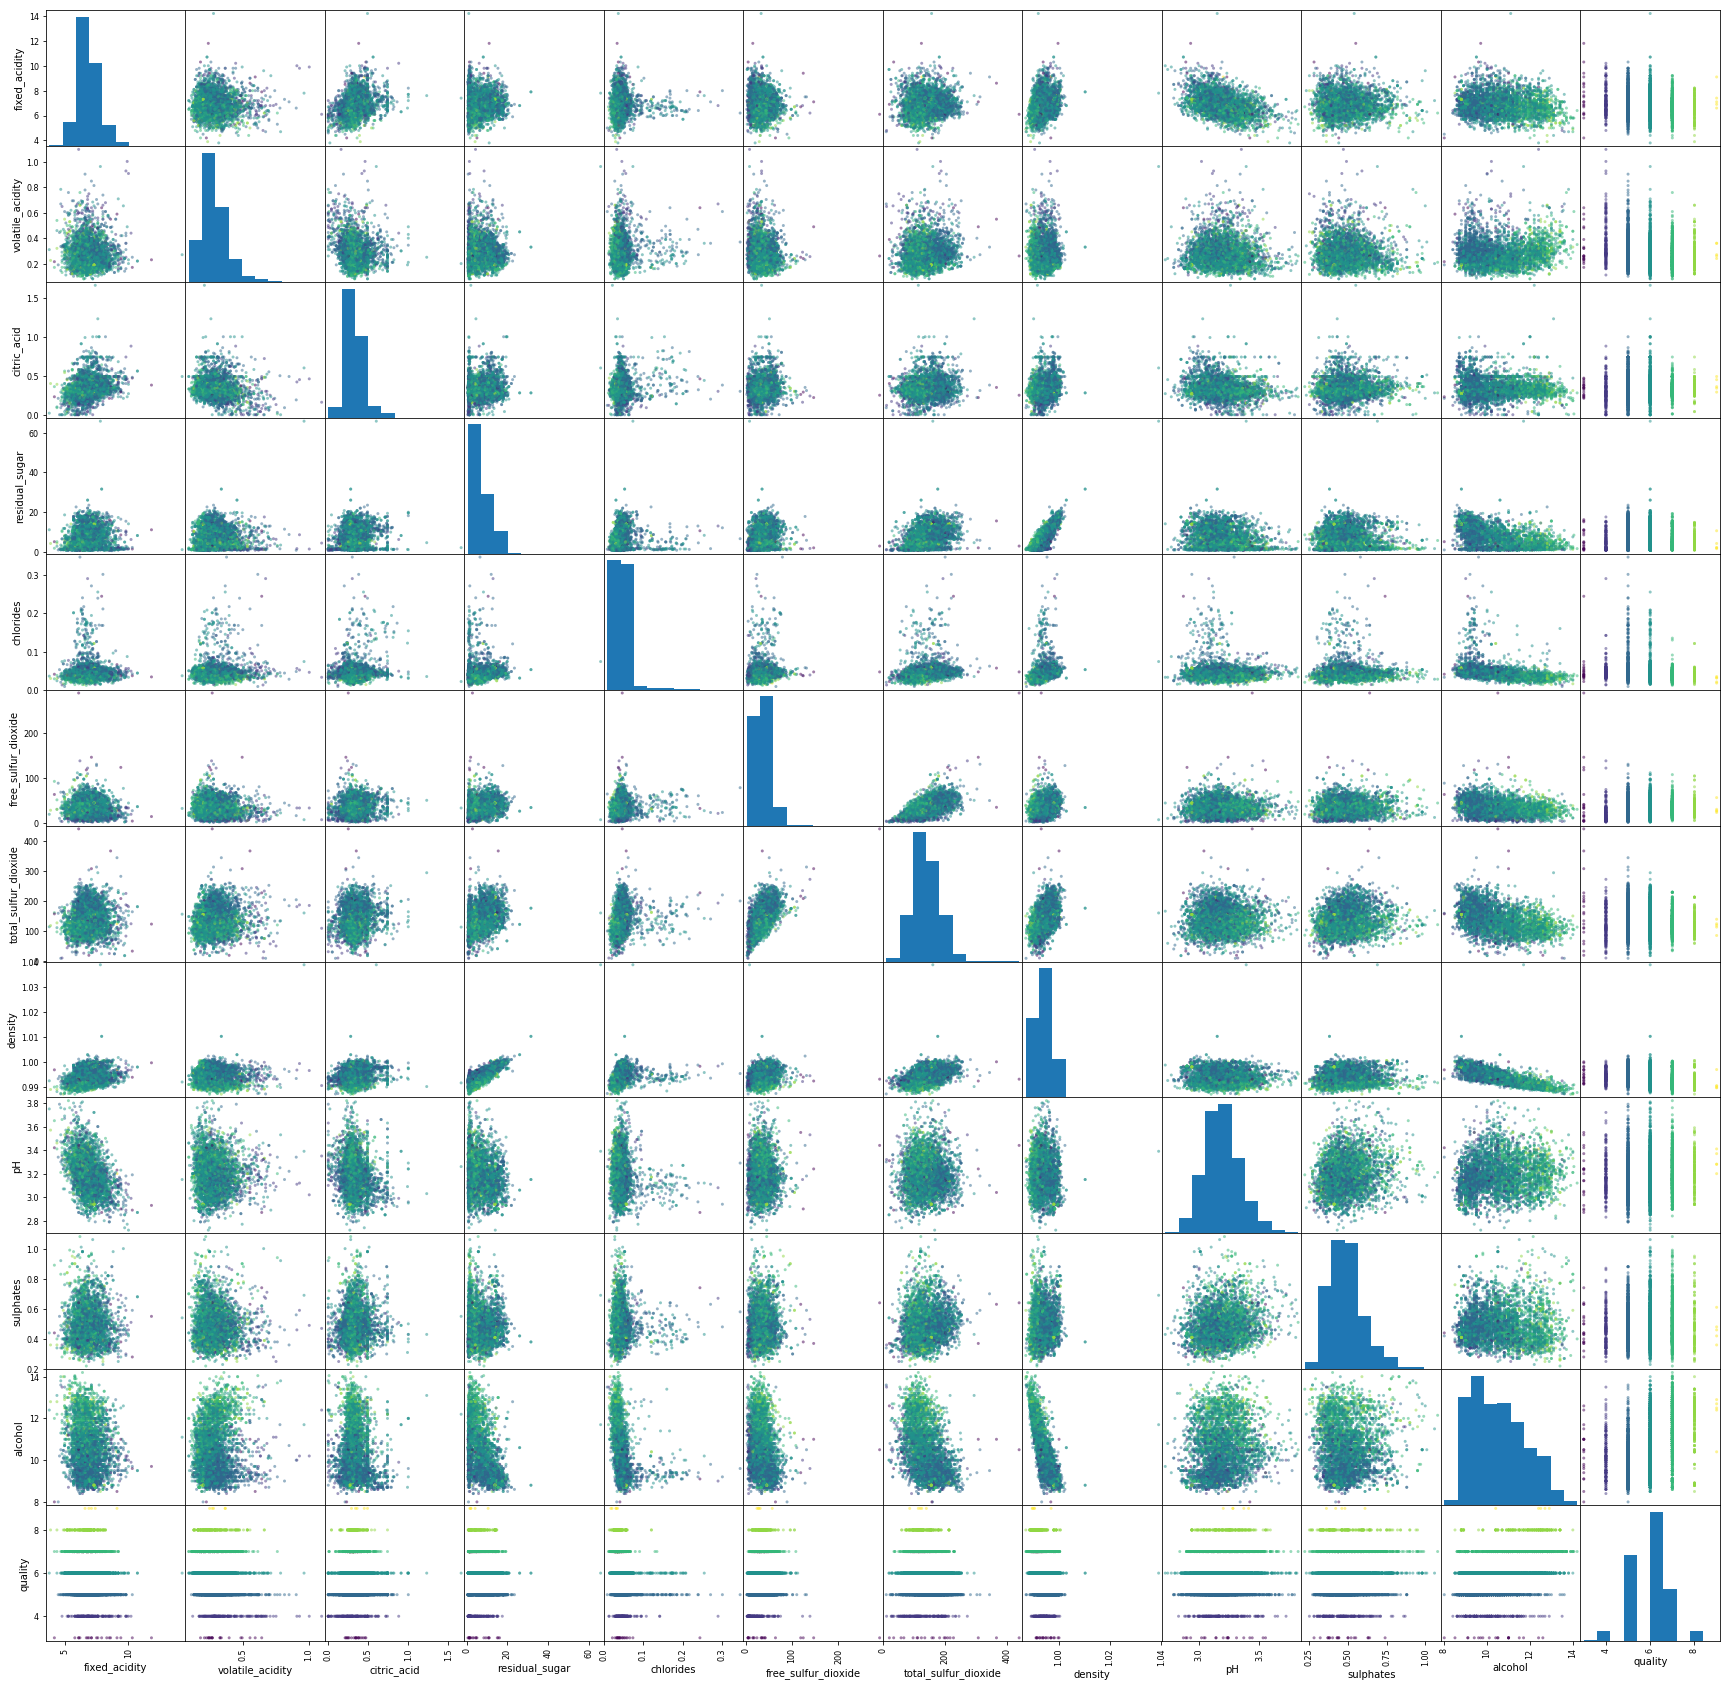

In [8]:
pd.plotting.scatter_matrix(wine, c=wine.quality, figsize=(30, 30));

# Visualization

In [9]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual_sugar, dtype: float64


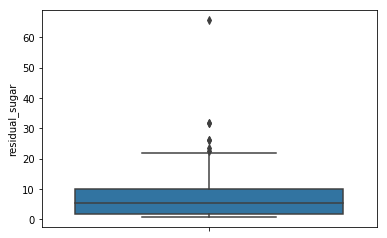

In [10]:
a = wine['residual_sugar'].describe()
print(a)
sn.boxplot('residual_sugar', data = wine, orient='v')

count    4898.000000
mean       35.308085
std        17.007137
min         2.000000
25%        23.000000
50%        34.000000
75%        46.000000
max       289.000000
Name: free_sulfur_dioxide, dtype: float64


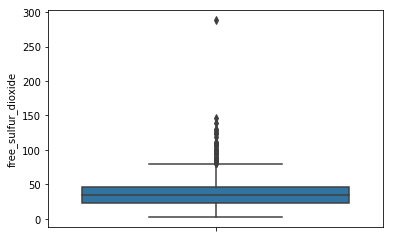

In [11]:
a = wine['free_sulfur_dioxide'].describe()
print(a)
sn.boxplot('free_sulfur_dioxide', data = wine, orient='v' )

count    4898.000000
mean      138.360657
std        42.498065
min         9.000000
25%       108.000000
50%       134.000000
75%       167.000000
max       440.000000
Name: total_sulfur_dioxide, dtype: float64


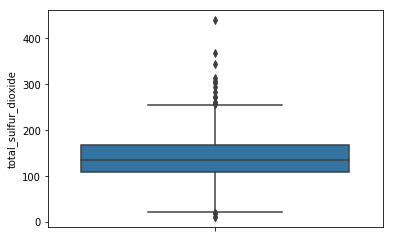

In [12]:
a = wine['total_sulfur_dioxide'].describe()
print(a)
sn.boxplot('total_sulfur_dioxide', data = wine, orient='v' )

# Model

In [13]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
lin_predict = model.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test, lin_predict)

array([[  0,   0,   3,   3,   0,   1],
       [  0,   0,  21,  19,   0,   0],
       [  0,   0, 227, 198,   1,   0],
       [  0,   0, 118, 540,  10,   0],
       [  0,   0,  19, 243,  18,   0],
       [  0,   0,   1,  42,   6,   0]], dtype=int64)

In [21]:
model.score(X_test, y_test)

0.53401360544217691

# Optimizing

In [22]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual_sugar, dtype: float64


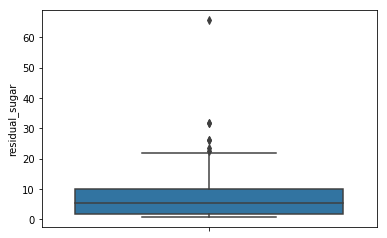

In [23]:
a = wine['residual_sugar'].describe()
print(a)
sn.boxplot('residual_sugar', data = wine, orient='v')

In [24]:
wine.shape

(4898, 12)

count    4898.000000
mean       35.308085
std        17.007137
min         2.000000
25%        23.000000
50%        34.000000
75%        46.000000
max       289.000000
Name: free_sulfur_dioxide, dtype: float64


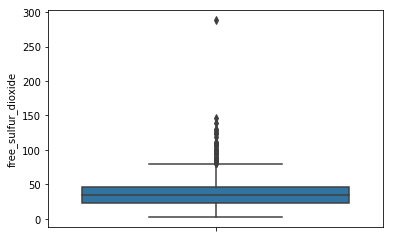

In [25]:
a = wine['free_sulfur_dioxide'].describe()
print(a)
sn.boxplot('free_sulfur_dioxide', data = wine, orient='v' )

In [26]:
wine = wine[wine.free_sulfur_dioxide <= 90]

In [27]:
wine.shape

(4872, 12)

count    4872.000000
mean       34.876026
std        15.753214
min         2.000000
25%        23.000000
50%        34.000000
75%        45.000000
max        89.000000
Name: free_sulfur_dioxide, dtype: float64


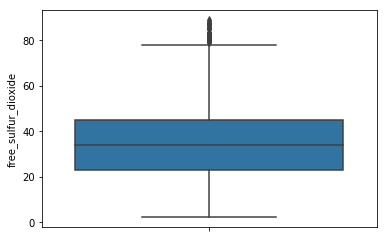

In [28]:
a = wine['free_sulfur_dioxide'].describe()
print(a)
sn.boxplot('free_sulfur_dioxide', data = wine, orient='v' )

count    4872.000000
mean      137.983477
std        42.043991
min         9.000000
25%       108.000000
50%       134.000000
75%       167.000000
max       366.500000
Name: total_sulfur_dioxide, dtype: float64


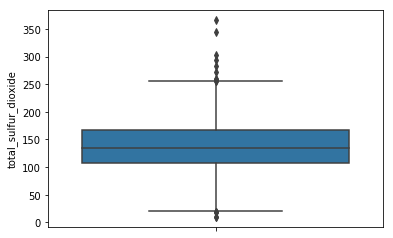

In [29]:
a = wine['total_sulfur_dioxide'].describe()
print(a)
sn.boxplot('total_sulfur_dioxide', data = wine, orient='v' )

In [30]:
wine = wine[wine.total_sulfur_dioxide > 25]
wine = wine[wine.total_sulfur_dioxide < 300]

In [31]:
wine.shape

(4859, 12)

In [32]:
wine.to_csv('wine.cleaned.csv', sep = ',', header=True)

# DecisionTreeClassifier

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [34]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [35]:
X.shape

(4859, 11)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42);

In [37]:
# X_train = preprocessing.scale(X_train)

In [38]:
X_train.shape

(3401, 11)

In [39]:
dt = DecisionTreeClassifier()

In [40]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
dt.score(X_test, y_test)

0.59396433470507548